In [1]:
import pandas as pd
import numpy as np
import random
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('csv/multi_touch_attribution_data.csv').rename(columns={'User ID':'user_id'})
df.head()

,user_id,Timestamp,Channel,Campaign,Conversion
0,83281,2025-02-10 07:58:51,Email,New Product Launch,No
1,68071,2025-02-10 23:38:48,Search Ads,Winter Sale,No
2,90131,2025-02-11 10:41:07,Social Media,Brand Awareness,Yes
3,71026,2025-02-10 08:19:44,Direct Traffic,-,Yes
4,94486,2025-02-10 15:15:46,Email,Retargeting,Yes


In [6]:
df.groupby('Conversion').agg({'user_id':'nunique'})

,user_id
Conversion,
No,2390
Yes,2381


### Remove users that have a missing campaign?

In [26]:
df['missing_campaign'] = np.where(df.Campaign=='-', 1,0)

df_user_missing_camp = df.groupby('user_id').agg({'missing_campaign':'max'})\
    .reset_index()\
    .rename(columns={'missing_campaign':'cust_has_missing_campaign'})

df = df.merge(df_user_missing_camp, how='left', on=['user_id'])


In [27]:
df.groupby(['cust_has_missing_campaign','Conversion']).agg({'user_id':'nunique'})

user_id
cust_has_missing_campaign Conversion         
0                         No              699
                          Yes             686
1                         No             1691
                          Yes            1695

In [9]:
df.groupby(['Channel','Conversion']).agg({'user_id':'nunique'})

user_id
Channel        Conversion         
Direct Traffic No              742
               Yes             733
Display Ads    No              723
               Yes             731
Email          No              713
               Yes             729
Referral       No              740
               Yes             728
Search Ads     No              739
               Yes             665
Social Media   No              725
               Yes             713

In [18]:
df['convert_binary'] = np.where(df.Conversion=='Yes', 1,0)

df_user_conv_status = df.groupby('user_id').agg({'convert_binary':'max'}).reset_index().rename(columns={'convert_binary':'cust_converted'})
df_user_touchpoints = df.groupby('user_id')['Timestamp'].agg(['count']).reset_index().rename(columns={'count':'count_touchpoints'})


df1 = df.merge(df_user_conv_status, how='left', on=['user_id'])\
            .merge(df_user_touchpoints, how='left', on=['user_id']).drop(columns=['convert_binary'])

df1.dtypes

user_id               int64
Timestamp            object
Channel              object
Campaign             object
Conversion           object
cust_converted        int64
count_touchpoints     int64
dtype: object

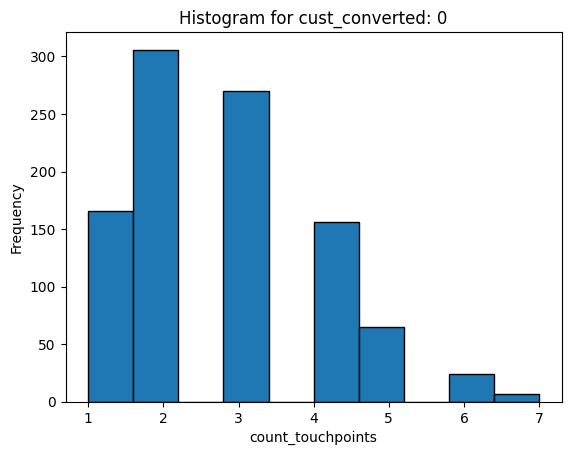

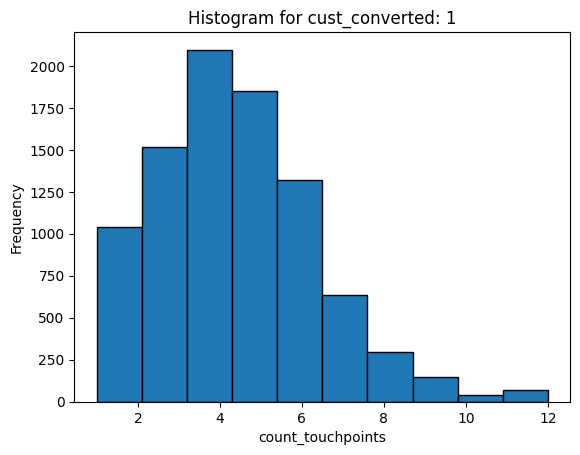

In [23]:
grouped = df1.groupby('cust_converted')

# Plot histograms for each group
for name, group in grouped:
    plt.figure() # Create a new figure for each histogram
    plt.hist(group['count_touchpoints'], bins=10, edgecolor='black')
    plt.title(f'Histogram for cust_converted: {name}')
    plt.xlabel('count_touchpoints')
    plt.ylabel('Frequency')
    plt.show()

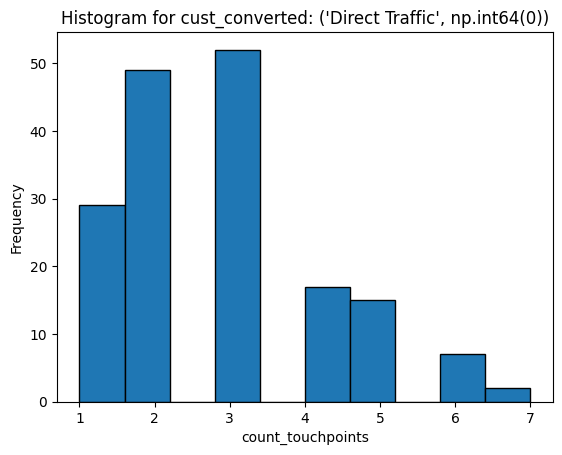

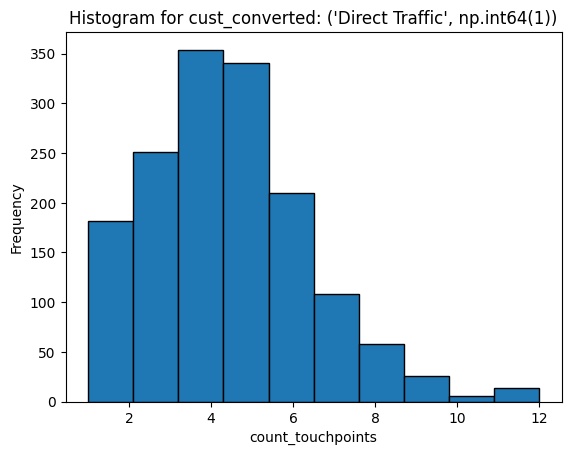

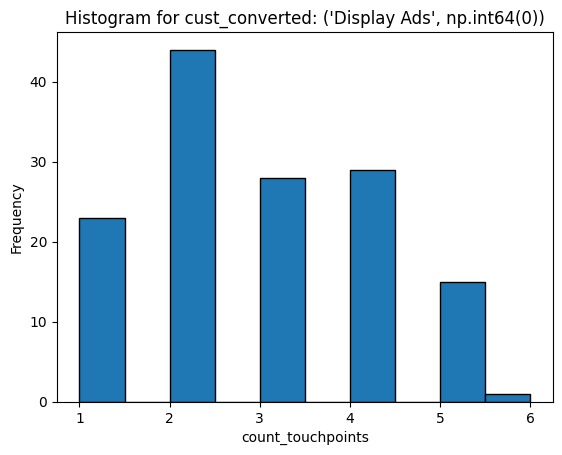

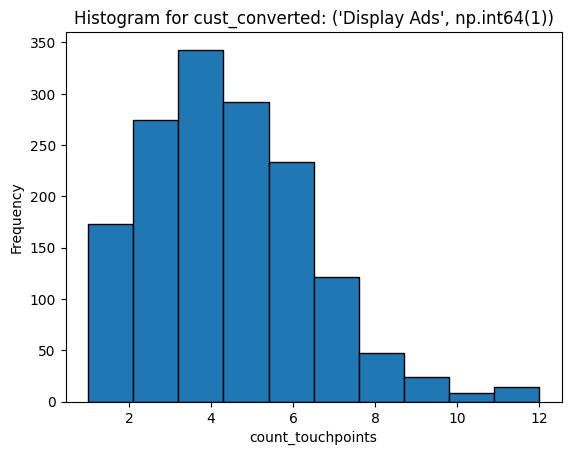

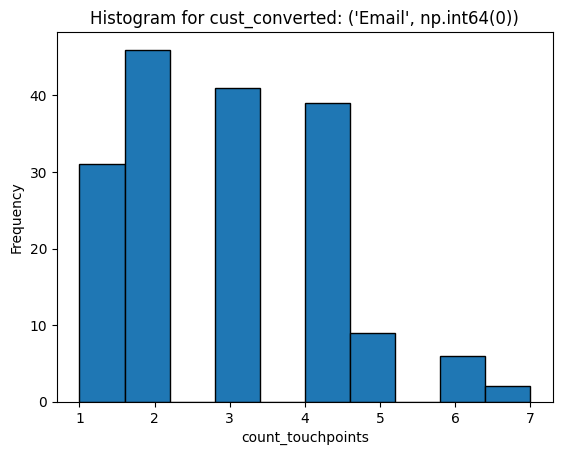

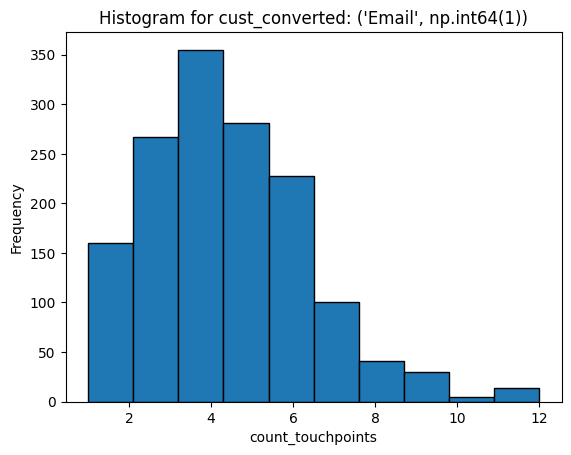

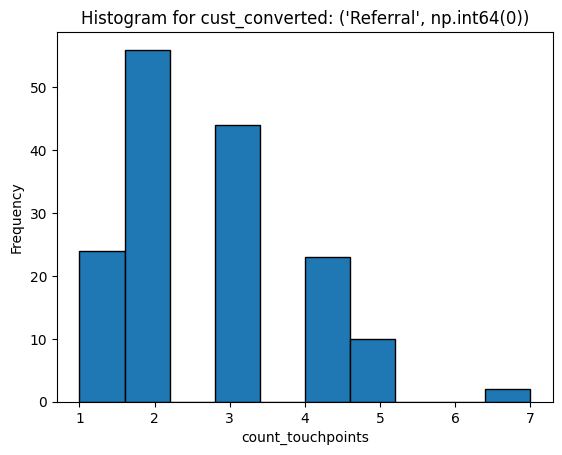

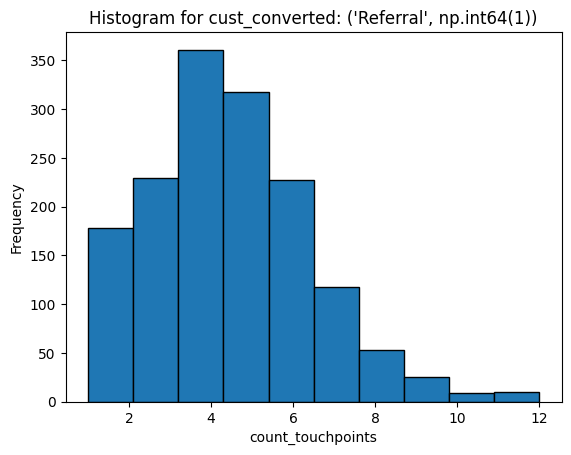

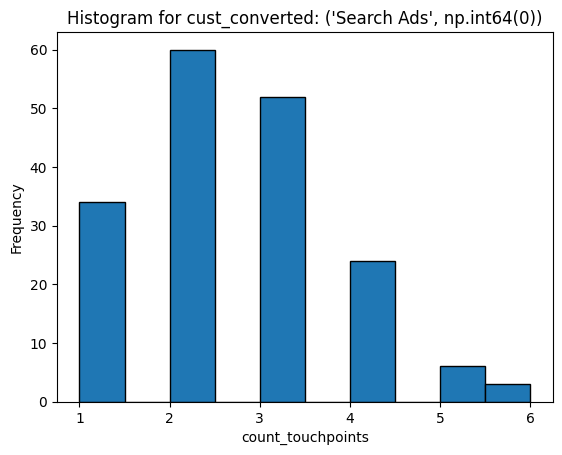

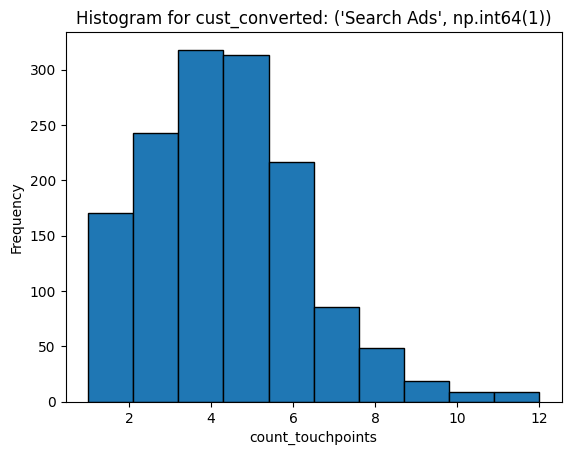

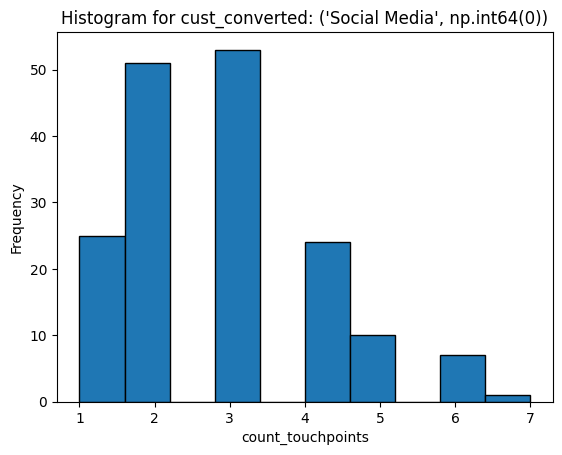

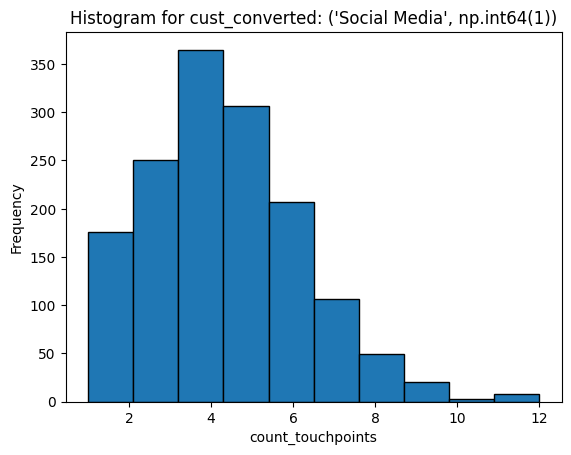

In [25]:
grouped = df1.groupby(['Channel','cust_converted'])

# Plot histograms for each group
for name, group in grouped:
    plt.figure() # Create a new figure for each histogram
    plt.hist(group['count_touchpoints'], bins=10, edgecolor='black')
    plt.title(f'Histogram for cust_converted: {name}')
    plt.xlabel('count_touchpoints')
    plt.ylabel('Frequency')
    plt.show()